<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/Report3_%EA%B0%95%EB%8F%99%EC%A4%80_bostonRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Report3. 빅데이터 분석과정 연습**

“보스톤 주택가격 예측” 문제에 대한 노트북 소스코드, 설명텍스트(마크다운)를 입력하여 실행 결과를 확인하고 저장된 노트북 파일(bostonRegression.ipynb) 을 제출하세요

* (1) Data Understand


In [2]:
import sklearn.datasets as ds

boston = ds.load_boston()

print("데이터의 형태:", boston.data.shape)
print("속성 이름:\n", boston.feature_names)
print("데이터 설명:\n", boston.DESCR)

데이터의 형태: (506, 13)
속성 이름:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
데이터 설명:
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      

Explore Data
* 기술 통계, 요약 통계

In [8]:
# 데이터 프레임 작성
import pandas as pd
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['MEDV'] = boston.target

In [9]:
# 모든 속성값들의 요약 통계 확인
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [10]:
# 상위 5개 확인
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* 시각화 : 데이터 속성값 분포 확인

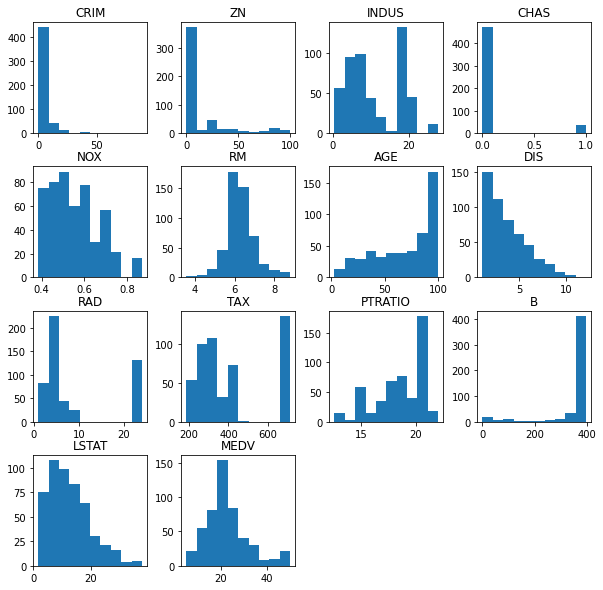

In [11]:
# 모든 속성값들의 분포를 그래프로 확인
df.hist(bins=10,figsize=(10,10),grid=False);

* 주택가격과 개별 속성들과의 상관관계를 확인하기 위해 pearson 상관계수 확인

In [12]:
corr = df.corr(method='pearson')
display(corr)

# 주택 가격(MEDV) 과의 상관계수만 추출
corrMEDV = corr['MEDV']
display(corrMEDV)

# 상관계수가 0.6 이상인 것만 확인
sub = corrMEDV[corrMEDV.abs()>0.6]
display(sub)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

RM       0.695360
LSTAT   -0.737663
MEDV     1.000000
Name: MEDV, dtype: float64

* 속성들 사이의 상관관계를 그래프로 확인

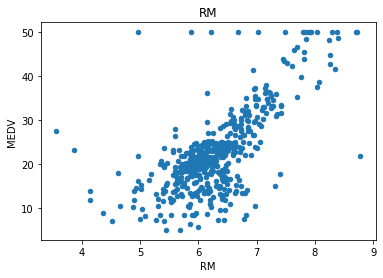

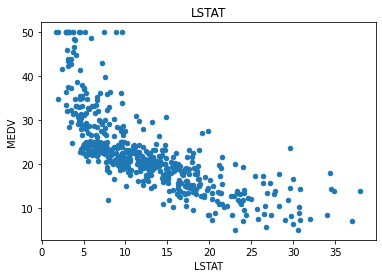

In [15]:
import matplotlib.pyplot as plt
# RM : 평균 방의 개수
# LSTAT : 저소득 주민 비율
fs = ['RM',"LSTAT"]
for f in fs:
  df.plot(x=f, y='MEDV', kind='scatter')
  plt.title(f)
  plt.show()

(2) Data Preparation

* 주택가격과 상관관계가 높은 변수만을 선택하여 모델 생성

In [19]:
X = df[fs].values
y = df['MEDV'].values

print(df[fs][:5])
print(df['MEDV'][:5])

      RM  LSTAT
0  6.575   4.98
1  6.421   9.14
2  7.185   4.03
3  6.998   2.94
4  7.147   5.33
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


(3) Modeling

* 모델을 학습하고 평가를 위하여 학습, 테스트 데이터 집합 분리
* sklearn.model_selection 모듈의 train_test_split() 사용

In [20]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))

print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_train 크기: (379, 2)
y_train 크기: (379,)
X_test 크기: (127, 2)
y_test 크기: (127,)


Build Model
* Linear Regression을 사용하여 선형외귀 모델 추정

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

w = lr.coef_
b = lr.intercept_
print("w (lr.coef_):", w)
print("b (lr.intercept_):", b)

w (lr.coef_): [ 5.01785312 -0.67451869]
b (lr.intercept_): -0.6047107435077201


Assess Model
* 평가용 데이터인 테스트 데이터를 이용하여 모델 정확성 확인

In [23]:
print("train set 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("test set 점수: {:.2f}".format(lr.score(X_test,y_test)))

train set 점수: 0.66
test set 점수: 0.57


(4) Evaluation

모델 예측
* 새로운 데이터를 이용하여 모델의 예측결과 확인

In [25]:
import numpy as np
# RM = 8, LSTAT = 2 인 경우 주택 가격 예측결과 확인
X_new = np.array([[8,2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = lr.predict(X_new)
print("예측: {}".format(prediction))

X_new.shape: (1, 2)
예측: [38.18907687]
